Data import and preprocessing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

housing = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/train.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1508343652&Signature=YikmX8ih5oObSLfJBGOZhiwNg6l9r8%2FwnLVrEcu2LEVHi3FOT1iefZ4UPSY6Mn9%2BAW6b0Rr4t%2F0iyt3749PL336bidxQBPNaQsGtBIzGvPsZ0TgAM%2BpWX5mJOW6hvUeTRQ8nnseeBhqQnOTTCVVBTgegXk%2FjCBqn6KVtDHJC0I30z8ArIW9w67EqDVvSPfpNda%2BOSOcRc7EKTYf9mCn5zo1e3Px%2FAy%2BVcupelWyJqDHdaFNCpWR1nhAdv9y11WigG5zqMmHUjMulT9kJKsi8nJ5a2gIj1GPF87SndajgOWd5zTXjnQBdiRV2KnyKKNmWJyZkkNMAtnKg6aj9%2BqcBjg%3D%3D')

In [2]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(housing.shape)

(1460, 81)


In [4]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

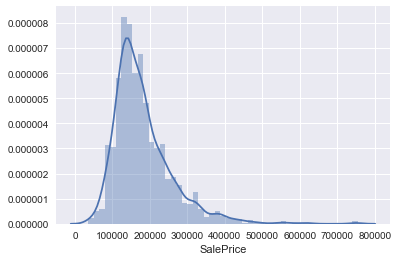

In [5]:
sns.distplot(housing['SalePrice']);

In [6]:
print("Skew", housing['SalePrice'].skew())
print("Kurt", housing['SalePrice'].kurt())

Skew 1.88287575977
Kurt 6.53628186006


In [7]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [8]:
def box_plot(feature):
    f,ax = plt.subplots(figsize=(10, 8))
    fig = sns.boxplot(x=housing[feature], y=housing['SalePrice'])

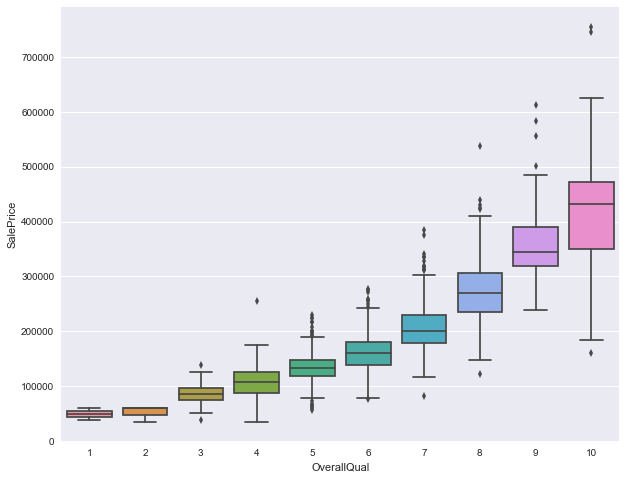

In [9]:
box_plot('OverallQual')

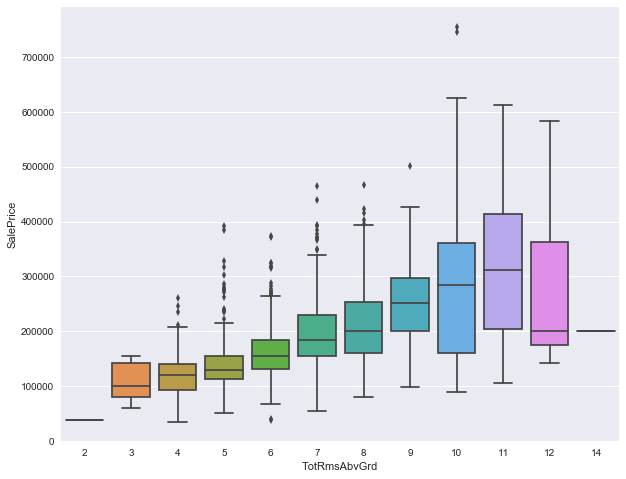

In [10]:
box_plot('TotRmsAbvGrd')

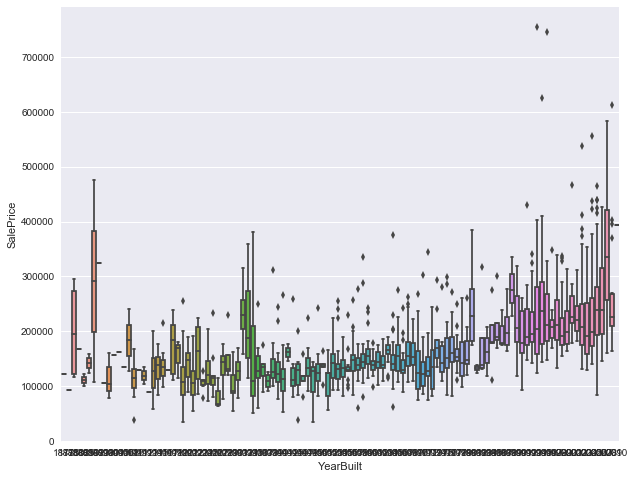

In [11]:
box_plot('YearBuilt')

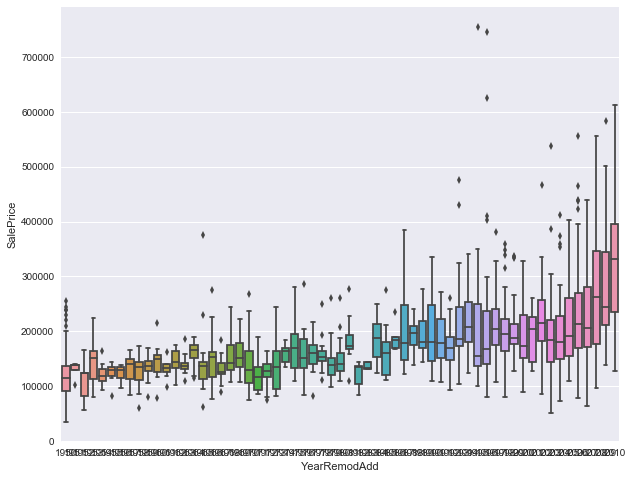

In [12]:
box_plot('YearRemodAdd')

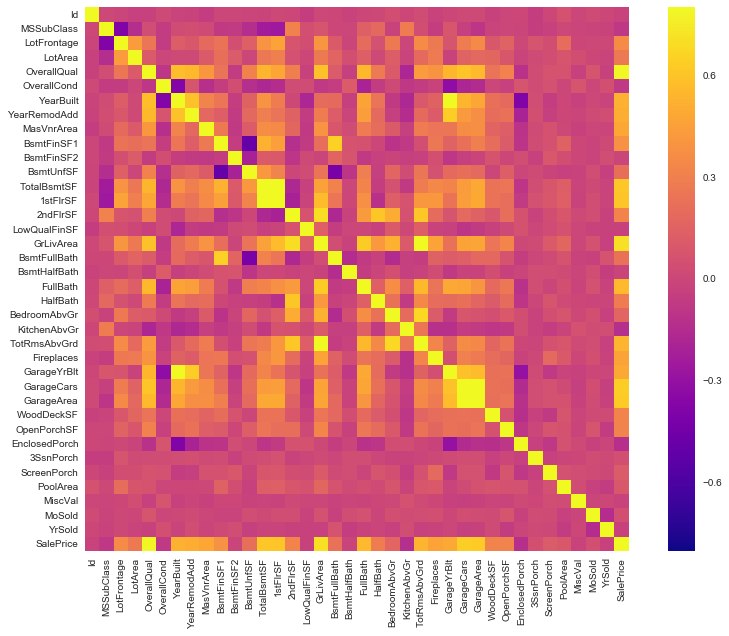

In [13]:
#correlation matrix
corrmat = housing.corr()
f, ax = plt.subplots(figsize=(14,10))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="plasma");

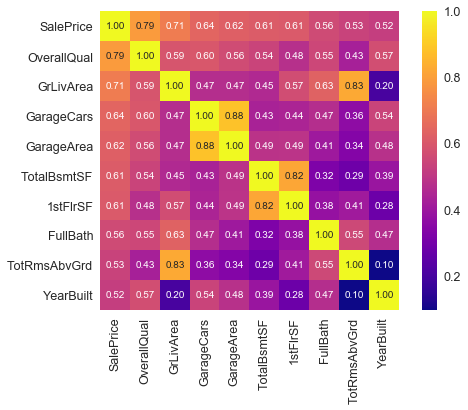

In [14]:
#correlation matrix ()
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values, 
                 xticklabels=cols.values, cmap='plasma')
plt.show()

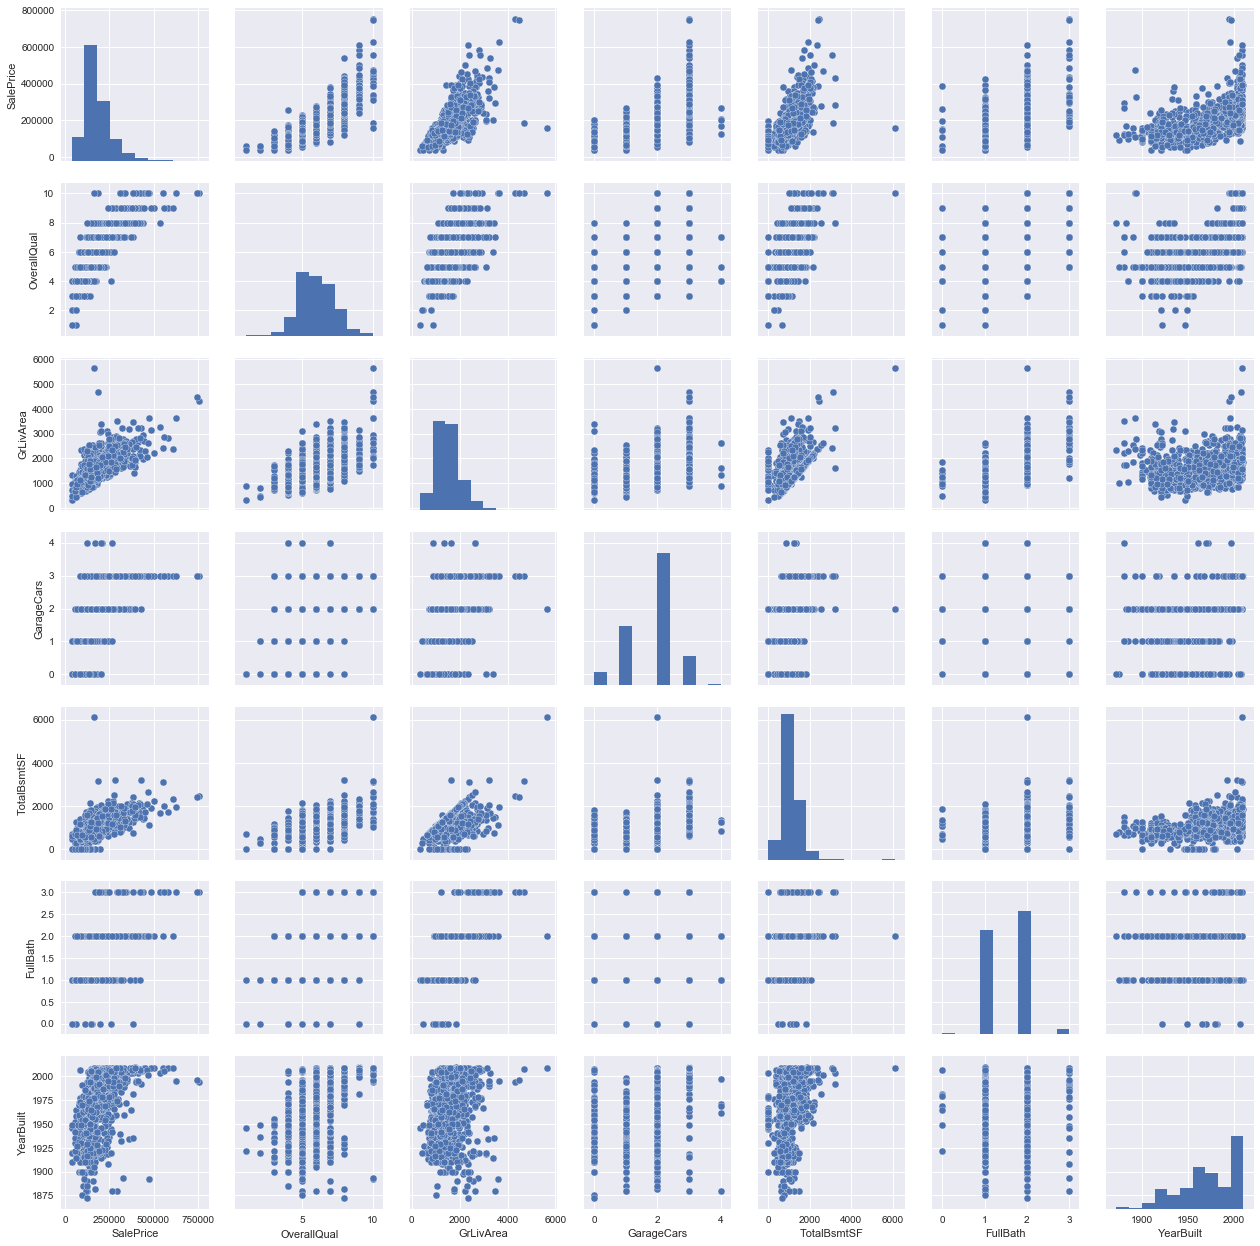

In [15]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 
        'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols], size=2.5)
plt.show();

In [16]:
#missing data
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 
                                                        'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [17]:
#Handle missing data
housing = housing.drop((missing_data[missing_data['Total'] > 1]).index,1)
housing = housing.drop(housing.loc[housing['Electrical'].isnull()].index)

housing.isnull().sum().max()

0

In [18]:
housing.shape

(1459, 63)

# Outlier analysis
#### Univariate Analysis

To observe outliers, we'll establish a threshold that defines an observed data point as an outlier. To do this, we'll standardize the data using sklearn's StandardScaler, converting the data values to have a mean of 0 and a standard deviation of 1. 

In [19]:
#detect outliers
#standardizing data
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(housing['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print("Outer range (low) of the distribution:")
print(low_range)
print('\nOuter range (high) of the distribution:')
print(high_range)

Outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

Outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


/Applications/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


From this, we can se that the low range values are not too far from 0 and the high range values are far from 0. 

#### Bivariate Analysis

Going back to the scatter plots, we will make note of possible outliers, making note of our univariate analysis, starting with 'SalePrice' vs 'GrLivArea'

In [20]:
def scatter_plot(var):
    data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

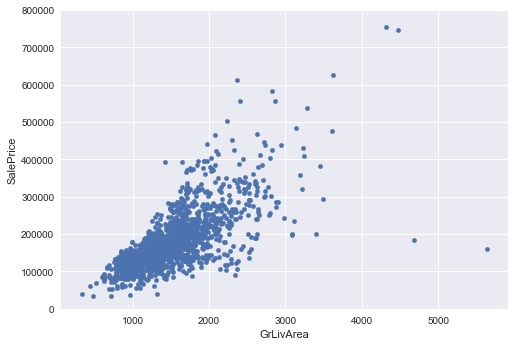

In [21]:
scatter_plot('GrLivArea')

From this scatterplot, we observe two data points with large 'GrLivArea' values and low 'SalePrice', which does not appear to fit with the trend present in the rest of the data. These could be representative of a different type of living space, such as property in agricultural area, which is likely not representative of the typical case. We will therfore  define these points as outliers and remove them. 

#### Deleting Outlier points

In [22]:
housing.sort_values(by = 'GrLivArea', ascending = False)[:2]
housing = housing.drop(housing[housing['Id'] == 1299].index)
housing = housing.drop(housing[housing['Id'] == 524].index)

We'll now do the same looking at 'SalePrice' vs 'TotalBsmtSF'

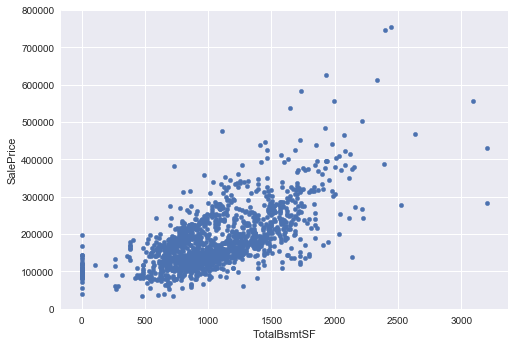

In [23]:
scatter_plot('TotalBsmtSF')

It is tempting to want to eliminate some observations, such as those with TotalBsmtSF greater than 3000, but we'll leave them for now

# Test for Normality
Here, we'll observe 'SalePrice' skewness and Kurtosis

In [24]:
from scipy.stats import norm
from scipy import stats

def prob_plot(var):
    sns.distplot(housing[var], fit=norm);
    fig = plt.figure()
    res = stats.probplot(housing[var], plot=plt)

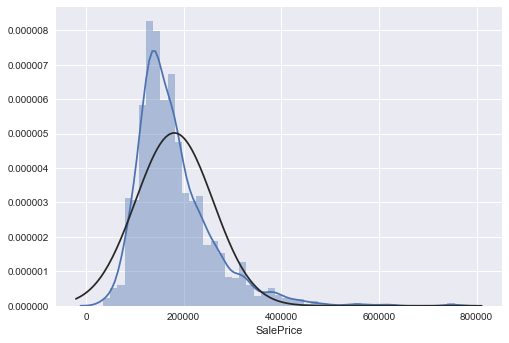

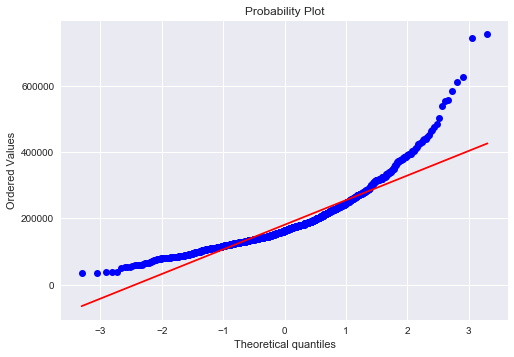

In [25]:
prob_plot('SalePrice')

From the histogram and probability plot, we can see that the 'SalesPrice' data is not normal. It shows positive skewness, 'peakedness', and does not follow the probability plot's diagonal line. To fix this, we will apply a data transformation. As the distribution demonstrates positive skewness, we will apply a log transformation:

In [26]:
housing['SalePrice'] = np.log(housing['SalePrice'])

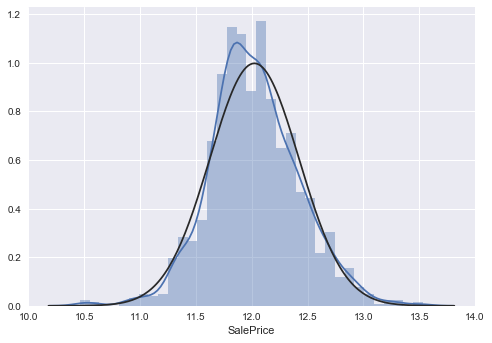

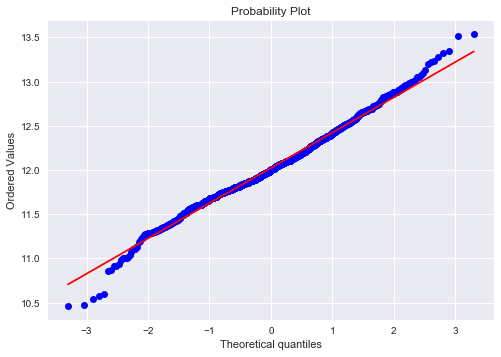

In [27]:
prob_plot('SalePrice')

The log transformation successfully removed the distribution's skew

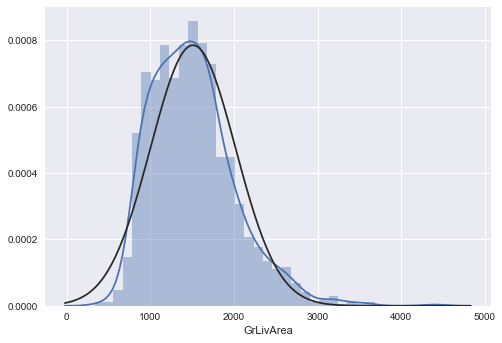

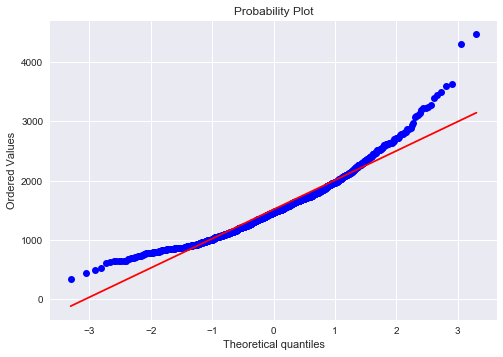

In [28]:
prob_plot('GrLivArea')

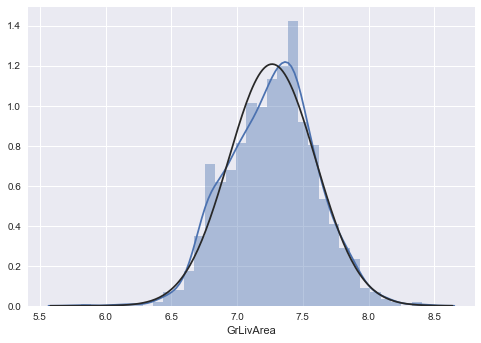

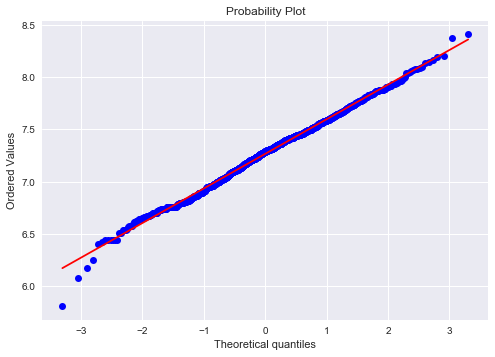

In [29]:
housing['GrLivArea'] = np.log(housing['GrLivArea'])
prob_plot('GrLivArea')

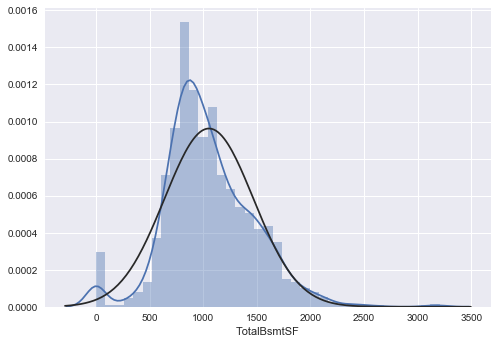

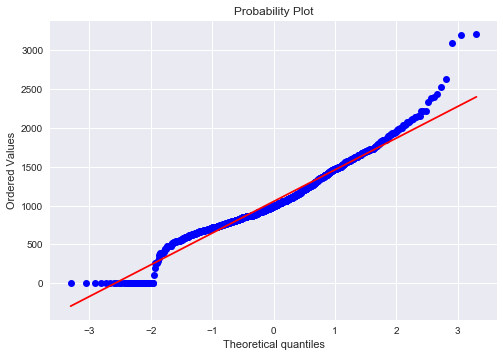

In [30]:
prob_plot('TotalBsmtSF')

'TotalBsmtSF' presents skewness, but the zero values won't let us do a log transformation. 

In [33]:
housing['HasBsmt'] = pd.Series(len(housing['TotalBsmtSF']), 
                               index=housing.index)
housing['HasBsmt'] = 0
housing.loc[housing['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [34]:
housing.loc[housing['HasBsmt']==1,'TotalBsmtSF'] = np.log(housing['TotalBsmtSF'])

/Applications/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


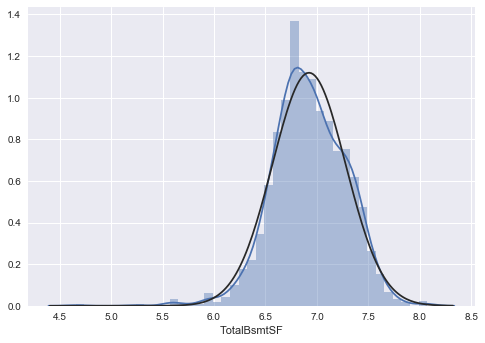

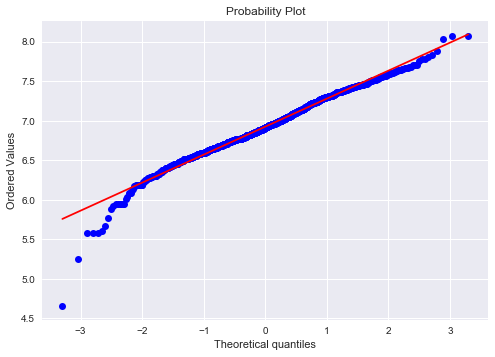

In [36]:
sns.distplot(housing[housing['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(housing[housing['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

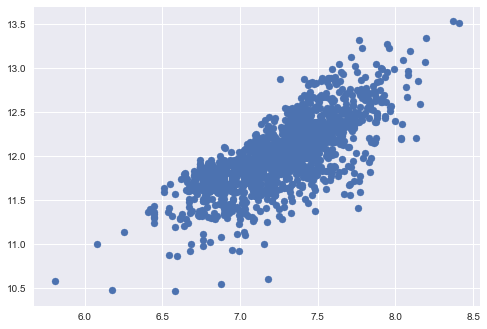

In [37]:
plt.scatter(housing['GrLivArea'], housing['SalePrice']);

In [ ]:
plt.scatter(housing[housing])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
housing_num = housing.select_dtypes(exclude=['object'])
housing_label = housing['SalePrice']
housing_num = housing_num.drop('SalePrice', axis=1)
housing_cat = housing.select_dtypes(include=['object'])

In [ ]:
housing_cat2 = housing_cat.fillna("None")
p = pd.get_option('display.precision')
housing_cat2 = housing_cat2.round(p).astype(str)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat2)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    #('mlb', MultiLabelBinarizer()),
])

print(num_attribs)

In [ ]:
num_attribs_tr = num_pipeline.fit_transform(housing_num)
num_attribs_tr

In [ ]:
num_attribs_tr.shape

In [ ]:
print(cat_attribs)

In [ ]:
housing_cat2.head()

In [ ]:
cat_attribs_tr =  cat_pipeline.fit_transform(housing_cat2)
print(cat_attribs_tr)

In [ ]:
mlb = MultiLabelBinarizer()
cat = mlb.fit_transform(cat_attribs_tr)
cat.shape

In [ ]:
cat

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(num_attribs_tr, housing_label)

In [ ]:
some_data = housing_num[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

In [ ]:
print("Labels:", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(num_attribs_tr)
lin_mse = mean_squared_error(housing_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(num_attribs_tr, housing_label)

In [ ]:
tree_pred = tree_reg.predict(num_attribs_tr)
tree_mse = mean_squared_error(housing_label, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(num_attribs_tr, housing_label)

In [ ]:
forest_pred = forest_reg.predict(num_attribs_tr)
forest_mse = mean_squared_error(housing_label, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
#test = pd.read_csv('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/test.csv?GoogleAccessId=competitions-data@kaggle-161607.iam.gserviceaccount.com&Expires=1506292107&Signature=ZU0b4%2FXbPXDNT%2FyDGf38v0jalHdhmVNaCFzlthxymrrRey1XFJGr2nu%2FoKIGCj4p4JToJ6daiE1rJxP%2BMTbtOIq%2FmzpH6oUYIifNG9oCh1oA48BkX35py44PDFT9sw%2FwiKAvUx8eQLq5j8fsGHBet%2BnwW31cVj8QvDv2TgF18u1cKfGKt1IBsVs84jrAUt1o0lAiQ6dfRStI6rEcUXaMj7IFQnI9rZWm1xZRmhzZfcuBgIRervDldsi75BvFdcgsAOpaCTlNRjtZBTwbzM5lamnRPACqNQcErfZQs2ulRvpBK%2Bl0MMMUGPzQ2dyCT4xvmAKFgXhoL9hN7kW7IXH32g%3D%3D', header=0)

In [ ]:
test_ids = test['Id']
num_attribs_test = num_pipeline.fit_transform(test)

final_model_pred = forest_reg.predict(num_attribs_test)

In [ ]:
ids = test['Id']
len(ids)
result = pd.DataFrame({"SalePrice":final_model_pred}, index=ids)
result
result.to_csv('submission.csv')